### 09-2. 순환 신경망으로 IMDB 리뷰 분류하기 ###

##### 1) 데이터 불러오기 & 전처리

In [1]:
# 데이터 불러오기

from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500) # 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

In [2]:
# train set, test set 크기 확인

print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
# 데이터는 파이썬 객체를 담은 넘파이 배열
# 첫번째 리뷰 길이 출력

print(len(train_input[0]))

218


In [4]:
# 두번재 리뷰 길이 출력

print(len(train_input[1]))

189


In [5]:
# 첫번재 리뷰에 담긴 내용 출력
# num_words를 500으로 설정했기 때문에 어휘 사전에 500개의 단어만 등재 / 어휘 사전에 없는 단어 = 2

print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
# 타깃 데이터 출력 ( 0:부정, 1:긍정)

print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
# trian set 에서 20%를  validation set 으로 분리

from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
# 각 리뷰의 길이를 계산하여 넘파이 배열에 배치 -> 원소들의 길이를 대강 알기 위해

import numpy as np

lengths = np.array([len(x) for x in train_input])
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [9]:
# 리뷰 길이의 평균값과 중간값

print(np.mean(lengths), np.median(lengths))

239.00925 178.0


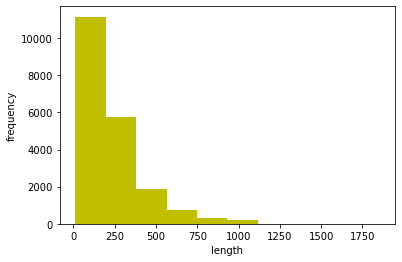

In [10]:
# 리뷰 길이를 histogram으로 표현

import matplotlib.pyplot as plt

plt.hist(lengths, color='y')
plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

In [11]:
# 100개의 단어만 사용 / 짧은 리뷰는 100에 맞추기 위해 패딩(0으로 채움) 사용
# keras의 pad_sequences() 함수 이용

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)  #maxlen을 100으로 설정하여 100보다 짧으면 0으로 패딩, 길면 잘라냄

In [12]:
# 패딩된 set 크기

print(train_seq.shape)

(20000, 100)


In [13]:
# 첫번째 샘플

print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
# 원본 샘플의 끝 확인(끝에서 10번째~끝)

print(train_input[0][-10:]) # seq 과 완벽히 일치하므로 앞부분이 잘렸음을 알 수 있음 -> 일반적으로 시퀀스의 뒷부분 정보가 더 유용하리라 기대하기 때문
# 앞부분을 자르고 싶다면 ped_sequences(truncating="post")

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [15]:
# 여섯번째 샘플 출력

print(train_seq[5]) # 앞부분 0을 통해 길이가 100 이하였음을 알 수 있음 / 마찬가지로 0패딩은 앞부분에

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
# validation set 의 길이 100으로 맞추기

val_seq = pad_sequences(val_input, maxlen=100)

##### 2) 순환 신경망 만들기

In [18]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
# 원-핫 인코딩 / keras.utils 패키지의 to_categorical() 함수 이용

train_oh = keras.utils.to_categorical(train_seq)

In [20]:
# train_oh의 배열 크기 출력

print(train_oh.shape)

(20000, 100, 500)


In [23]:
# 첫번째 샘플ㄹ의 첫번째 토큰(=10)의 인코딩 확인

print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0])) # 합이 1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [24]:
# val_seq 도 원-핫 인코딩 시행

val_oh = keras.utils.to_categorical(val_seq)

In [25]:
# 모델 요약

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


##### 3) 순환 신경망 훈련하기 #####

In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb]) 

Epoch 1/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6973 - accuracy: 0.5019 - val_loss: 0.6962 - val_accuracy: 0.4986
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6940 - accuracy: 0.5092 - val_loss: 0.6945 - val_accuracy: 0.5038
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6922 - accuracy: 0.5165 - val_loss: 0.6932 - val_accuracy: 0.5128
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6907 - accuracy: 0.5246 - val_loss: 0.6921 - val_accuracy: 0.5214
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6894 - accuracy: 0.5321 - val_loss: 0.6912 - val_accuracy: 0.5272
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6880 - accuracy: 0.5376 - val_loss: 0.6904 - val_accuracy: 0.5318
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6867 - accuracy: 0.5451 - val_loss: 0.6897 - val_accuracy:

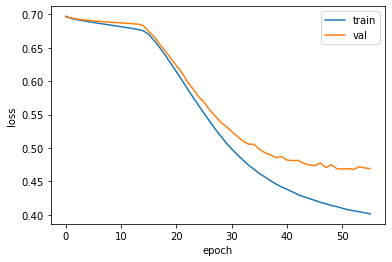

In [29]:
# 훈련 손실과 검증 손실 그래프로 나타내기

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [30]:
# sequence된 배열과 one-hot encoding 된 배열 크기 비교

print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


##### - 단어 임베딩 사용하기 #####

In [39]:
# keras.layers 패키지의 Embedding 클래스로 임베딩

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100)) # 단어사전의 크기 500, 임베딩 벡터의 크기 16, 입력 시퀀스 길이 100
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation="sigmoid"))

In [40]:
# 모델 구조 확인

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 모델 훈련

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6733 - accuracy: 0.5805 - val_loss: 0.6484 - val_accuracy: 0.6406
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6257 - accuracy: 0.6812 - val_loss: 0.6114 - val_accuracy: 0.7070
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5968 - accuracy: 0.7187 - val_loss: 0.5877 - val_accuracy: 0.7324
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5757 - accuracy: 0.7419 - val_loss: 0.5741 - val_accuracy: 0.7368
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5600 - accuracy: 0.7534 - val_loss: 0.5599 - val_accuracy: 0.7526
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5453 - accuracy: 0.7661 - val_loss: 0.5486 - val_accuracy: 0.7560
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5327 - accuracy: 0.7709 - val_loss: 0.5369 - val_accuracy: 0.764

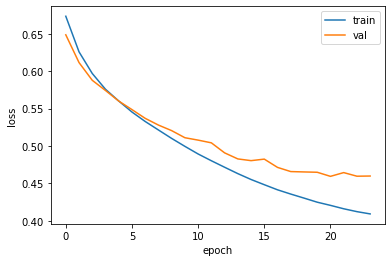

In [43]:
# 훈련 손실과 검증 손실 그래프

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()